# 44688-Data Analytics Capstone Project

## FDIP (Fire Department Incident Prediction)

##### 03/13/23 - 04/28/23

##### Debra D. "DeeDee" Walker

##### Northwest Missouri State University, Maryville MO 64468, USA

In [1]:
#Import the pandas framework to import and work with the dataset
import pandas as pd

#Set pandas to show all rows and not truncate
pd.set_option('display.max_rows', None)

#Import datetime so we can work with dates and times
import datetime as dt

#Import numpy
import numpy as np

#import os module
import os as os

#for use with cartesian product
from itertools import product

#import stats package
import scipy.stats as ss

#graphic imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Original data was accessed through the csv file download due to the limitations of the API on the site for this large dataset. The API endpoint limits hits and requires data to be requested by page
# Data was pulled from https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd on March 16, 2023 then cleaned for use.
#Use the function read_csv from pandas and create a dataframe assigned to variable df
df = pd.read_csv('fdip_clean.csv', sep=',')

#convert INCIDENT_DATE_TIME from object to datetime format
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'], infer_datetime_format = True)

In [2]:
df.head(n=10)

,IM_INCIDENT_KEY,INCIDENT_DATE_TIME,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,ZIP_CODE,BOROUGH_DESC,INCIDENT_CATEGORY,INCIDENT_CATNUM,LEVEL_CATEGORY,BOROUGH_NUM,Day_of_week,Hour_of_day,MONTH,DAY_NUM,INCIDENT_LENGTH,UNITS_CATEGORY
0,63583742,2018-07-21 12:18:19,1,0.66,10475,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,12,7,6,30min-45min,1
1,63583743,2018-07-21 12:18:26,1,0.12,11230,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,12,7,6,<=15min,1
2,63584267,2018-07-21 14:16:40,2,0.02,11204,4 - Brooklyn,HAZARDOUS CONDITION-NO FIRE,4,1,4,Saturday,14,7,6,<=15min,2
3,63584484,2018-07-21 15:07:51,1,0.37,11235,4 - Brooklyn,SERVICE CALL,5,1,4,Saturday,15,7,6,15min-30min,1
4,63584485,2018-07-21 15:08:36,1,0.32,11208,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,15,7,6,15min-30min,1
5,63584710,2018-07-21 16:03:49,1,0.44,11693,5 - Queens,SERVICE CALL,5,1,5,Saturday,16,7,6,15min-30min,1
6,63584716,2018-07-21 16:06:01,1,1.77,10464,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,16,7,6,1-2hr,1
7,63584720,2018-07-21 16:05:50,1,0.19,10451,2 - Bronx,SERVICE CALL,5,1,2,Saturday,16,7,6,<=15min,1
8,63584722,2018-07-21 16:06:40,1,0.39,10468,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,16,7,6,15min-30min,1
9,63584727,2018-07-21 16:08:38,1,0.26,11357,5 - Queens,RESCUE & EMS,3,1,5,Saturday,16,7,6,15min-30min,1


In [6]:
df.iloc[:1600000].info(verbose=True)
df.iloc[1600000:2340417].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   IM_INCIDENT_KEY          1600000 non-null  int64         
 1   INCIDENT_DATE_TIME       1600000 non-null  datetime64[ns]
 2   UNITS_ONSCENE            1600000 non-null  int64         
 3   TOTAL_INCIDENT_DURATION  1600000 non-null  float64       
 4   ZIP_CODE                 1600000 non-null  int64         
 5   BOROUGH_DESC             1600000 non-null  object        
 6   INCIDENT_CATEGORY        1600000 non-null  object        
 7   INCIDENT_CATNUM          1600000 non-null  int64         
 8   LEVEL_CATEGORY           1600000 non-null  int64         
 9   BOROUGH_NUM              1600000 non-null  int64         
 10  Day_of_week              1600000 non-null  object        
 11  Hour_of_day              1600000 non-null  int64         
 12  

In [7]:
df.describe()

,IM_INCIDENT_KEY,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,ZIP_CODE,INCIDENT_CATNUM,LEVEL_CATEGORY,BOROUGH_NUM,Hour_of_day,MONTH,DAY_NUM
count,2.340416e+06,2.340416e+06,2.340416e+06,2.340416e+06,2.340416e+06,2.340416e+06,2.340416e+06,2.340416e+06,2.340416e+06,2.340416e+06
mean,6.518737e+07,1.934346e+00,4.023169e-01,1.075483e+04,4.033446e+00,1.021416e+00,3.005652e+00,1.323228e+01,6.590439e+00,3.992897e+00
std,2.518245e+06,1.752352e+00,8.503893e-01,5.512771e+02,1.751322e+00,3.764912e-01,1.511745e+00,6.278274e+00,3.438686e+00,1.990724e+00
min,6.084081e+07,1.000000e+00,0.000000e+00,7.735000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,6.301218e+07,1.000000e+00,2.100000e-01,1.030200e+04,3.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00,4.000000e+00,2.000000e+00
50%,6.516579e+07,1.000000e+00,2.900000e-01,1.047500e+04,3.000000e+00,1.000000e+00,3.000000e+00,1.400000e+01,7.000000e+00,4.000000e+00
75%,6.736267e+07,2.000000e+00,4.400000e-01,1.122800e+04,5.000000e+00,1.000000e+00,4.000000e+00,1.800000e+01,1.000000e+01,6.000000e+00
max,6.950386e+07,1.360000e+02,4.768000e+02,1.169700e+04,8.000000e+00,7.000000e+00,5.000000e+00,2.300000e+01,1.200000e+01,7.000000e+00


In [8]:
df.shape

(2340416, 16)

In [9]:
print (df['INCIDENT_DATE_TIME'].min())
print (df['INCIDENT_DATE_TIME'].max())

2017-01-01 00:00:22
2021-12-31 23:59:24


In [10]:
df.BOROUGH_DESC.value_counts()

4 - Brooklyn         685612
1 - Manhattan        568009
2 - Bronx            487961
5 - Queens           475797
3 - Staten Island    123037
Name: BOROUGH_DESC, dtype: int64

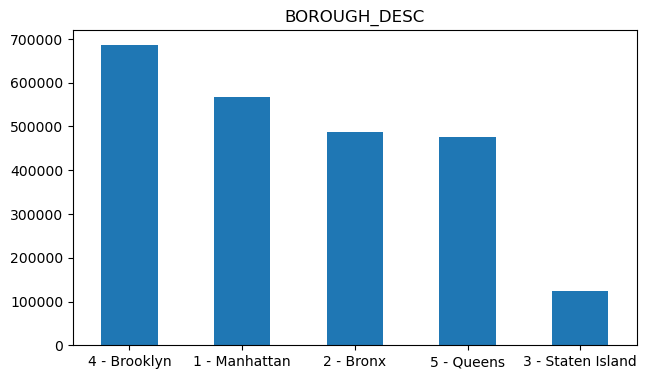

In [11]:
plt.subplot(221)
df['BOROUGH_DESC'].value_counts().plot(kind='bar', title='BOROUGH_DESC', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [12]:
df.LEVEL_CATEGORY.value_counts()

1    2325240
7       9032
0       5299
2        598
3        150
4         60
5         33
6          4
Name: LEVEL_CATEGORY, dtype: int64

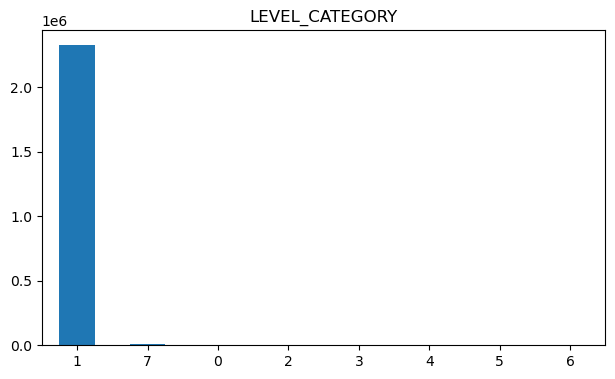

In [13]:
plt.subplot(221)
df['LEVEL_CATEGORY'].value_counts().plot(kind='bar', title='LEVEL_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [14]:
df.Hour_of_day.value_counts()

17    138404
18    136788
16    131775
19    131512
15    129412
14    127952
13    124016
20    122886
12    120133
11    116026
21    113171
10    110828
9     104659
22    101506
8      92028
23     91453
0      76619
7      72991
1      61826
6      55017
2      50794
5      44229
3      44188
4      42203
Name: Hour_of_day, dtype: int64

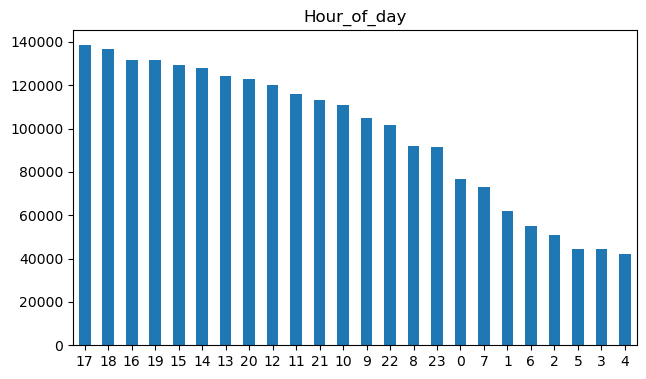

In [15]:
plt.subplot(221)
df['Hour_of_day'].value_counts().plot(kind='bar', title='Hour_of_day', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [17]:
df.MONTH.value_counts()

7     213437
8     210966
1     203893
10    201599
12    199571
9     198821
6     198015
11    191401
5     189184
3     182657
2     176211
4     174661
Name: MONTH, dtype: int64

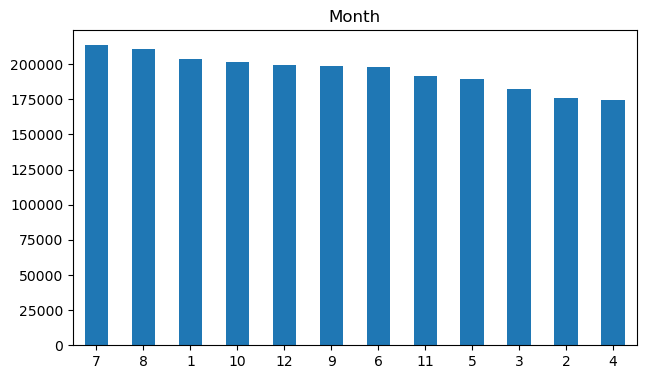

In [18]:
plt.subplot(221)
df['MONTH'].value_counts().plot(kind='bar', title='Month', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [19]:
df.UNITS_CATEGORY.value_counts()

1            1442299
2             380113
3             195020
6             103379
5             101955
4              98041
7 or more      19609
Name: UNITS_CATEGORY, dtype: int64

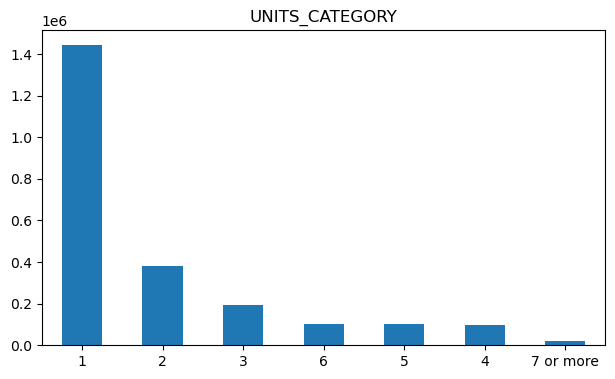

In [20]:
plt.subplot(221)
df['UNITS_CATEGORY'].value_counts().plot(kind='bar', title='UNITS_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [21]:
df.INCIDENT_LENGTH.value_counts()

15min-30min    962832
<=15min        914961
30min-45min    226714
45min-1hr      115634
1-2hr          105312
2-3hr            9278
3hr>             5685
Name: INCIDENT_LENGTH, dtype: int64

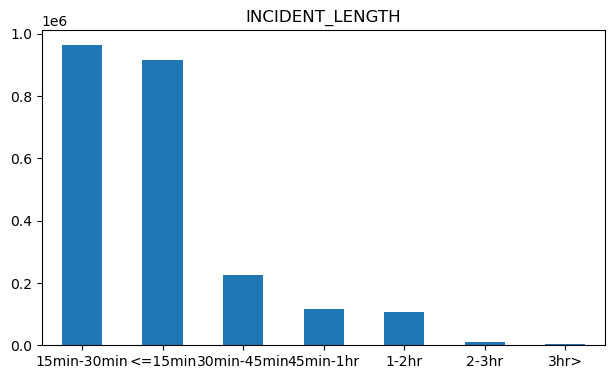

In [22]:
plt.subplot(221)
df['INCIDENT_LENGTH'].value_counts().plot(kind='bar', title='INCIDENT_LENGTH', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [23]:
df.Day_of_week.value_counts()

Friday       346758
Thursday     335433
Monday       335065
Saturday     335060
Tuesday      332975
Wednesday    331933
Sunday       323192
Name: Day_of_week, dtype: int64

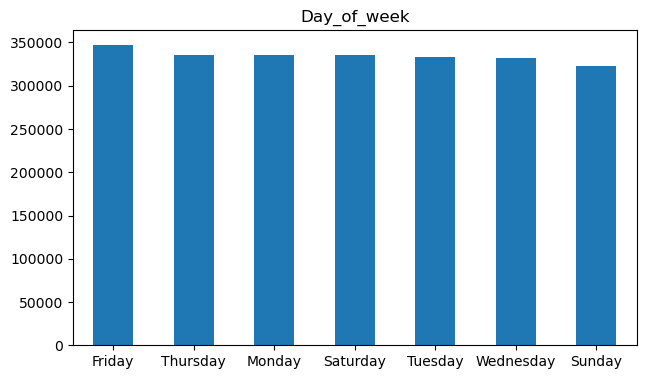

In [24]:
plt.subplot(221)
df['Day_of_week'].value_counts().plot(kind='bar', title='Day_of_week', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [25]:
df.INCIDENT_CATEGORY.value_counts()

RESCUE & EMS                                         1156625
FALSE ALARM FALSE CALL                                384618
SERVICE CALL                                          240022
HAZARDOUS CONDITION-NO FIRE                           191543
CANCELED, GOOD INTENT                                 185942
FIRE                                                  169626
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE      11690
SEVERE WEATHER & NATURAL DISASTER                        350
Name: INCIDENT_CATEGORY, dtype: int64

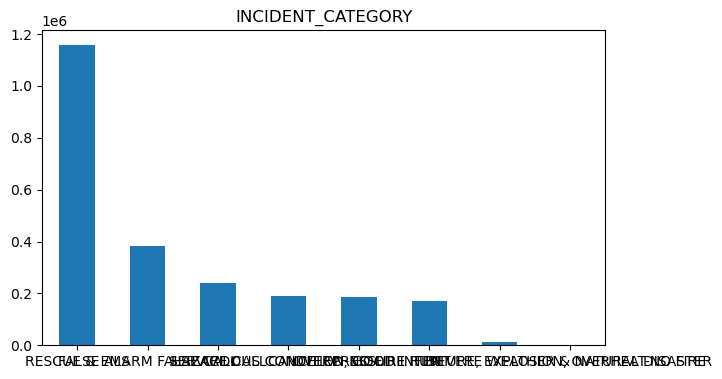

In [26]:
plt.subplot(221)
df['INCIDENT_CATEGORY'].value_counts().plot(kind='bar', title='INCIDENT_CATEGORY', figsize=(16,9))
plt.xticks(rotation=0)
plt.show()

In [27]:
df.ZIP_CODE.value_counts()

10029    61219
10456    51492
11206    44643
11212    36702
11207    35035
10002    32488
10451    31391
11201    28636
10467    28511
10457    28493
10027    28449
11208    28337
10453    28156
11101    27667
10458    27512
11226    26959
11211    26164
11221    26043
11233    25816
10314    24338
10460    23816
10035    23403
10454    22703
11236    22634
10025    22547
10452    22341
10009    22056
11203    21884
10455    21773
11234    21598
11213    19970
10021    19825
11224    19805
10003    19657
10472    19254
10468    19185
11691    19113
10469    18909
10473    18791
11385    18573
10032    18524
10016    17880
10001    17781
10463    17641
11216    17548
10466    17445
11229    17392
11235    17205
10459    17196
11373    17030
10019    16980
10031    16795
10026    16592
11230    16380
11368    16350
10462    15997
11432    15862
11434    15665
11210    15466
11220    15451
11217    15425
10011    15300
11214    15165
10036    15140
11237    15123
10304    15060
11205    1

In [28]:
df.nunique()

IM_INCIDENT_KEY            2340416
INCIDENT_DATE_TIME         2319892
UNITS_ONSCENE                   91
TOTAL_INCIDENT_DURATION       1852
ZIP_CODE                       179
BOROUGH_DESC                     5
INCIDENT_CATEGORY                8
INCIDENT_CATNUM                  8
LEVEL_CATEGORY                   8
BOROUGH_NUM                      5
Day_of_week                      7
Hour_of_day                     24
MONTH                           12
DAY_NUM                          7
INCIDENT_LENGTH                  7
UNITS_CATEGORY                   7
dtype: int64

In [33]:
df.corr(method='pearson',numeric_only=True)

,IM_INCIDENT_KEY,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,ZIP_CODE,INCIDENT_CATNUM,LEVEL_CATEGORY,BOROUGH_NUM,Hour_of_day,MONTH,DAY_NUM
IM_INCIDENT_KEY,1.000000,-0.040234,0.015002,0.008336,-0.017575,-0.010357,0.007931,-0.006727,0.213033,0.002032
UNITS_ONSCENE,-0.040234,1.000000,0.157386,-0.031708,0.071559,0.374696,-0.035557,0.003546,-0.015534,0.004047
TOTAL_INCIDENT_DURATION,0.015002,0.157386,1.000000,-0.041131,-0.087897,0.142402,-0.042258,-0.011481,0.000173,-0.005265
ZIP_CODE,0.008336,-0.031708,-0.041131,1.000000,-0.058965,0.013437,0.965793,-0.001846,-0.003662,0.001424
INCIDENT_CATNUM,-0.017575,0.071559,-0.087897,-0.058965,1.000000,-0.101327,-0.057906,-0.039491,0.004528,-0.016918
LEVEL_CATEGORY,-0.010357,0.374696,0.142402,0.013437,-0.101327,1.000000,0.014452,-0.005480,-0.009963,0.001813
BOROUGH_NUM,0.007931,-0.035557,-0.042258,0.965793,-0.057906,0.014452,1.000000,-0.002105,-0.004142,0.000720
Hour_of_day,-0.006727,0.003546,-0.011481,-0.001846,-0.039491,-0.005480,-0.002105,1.000000,-0.002603,-0.015476
MONTH,0.213033,-0.015534,0.000173,-0.003662,0.004528,-0.009963,-0.004142,-0.002603,1.000000,0.008206
DAY_NUM,0.002032,0.004047,-0.005265,0.001424,-0.016918,0.001813,0.000720,-0.015476,0.008206,1.000000


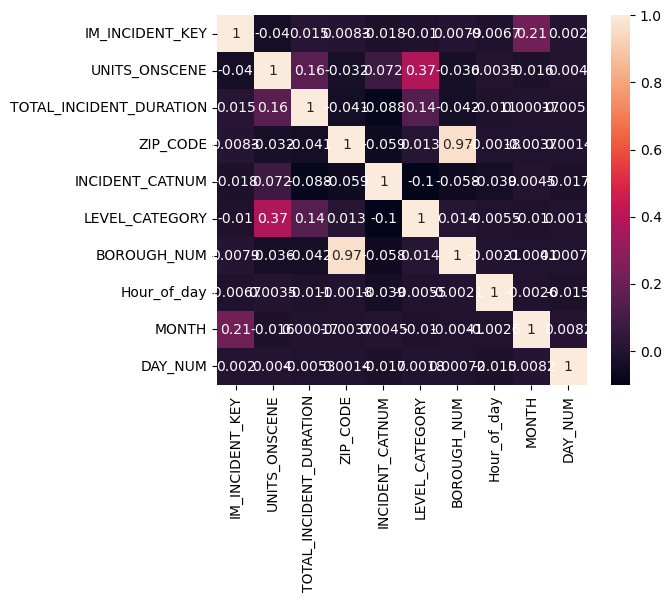

In [29]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, square = True)
plt.yticks(rotation=0)
plt.show()

array([[<AxesSubplot: title={'center': 'IM_INCIDENT_KEY'}>,
        <AxesSubplot: title={'center': 'INCIDENT_DATE_TIME'}>,
        <AxesSubplot: title={'center': 'UNITS_ONSCENE'}>],
       [<AxesSubplot: title={'center': 'TOTAL_INCIDENT_DURATION'}>,
        <AxesSubplot: title={'center': 'ZIP_CODE'}>,
        <AxesSubplot: title={'center': 'INCIDENT_CATNUM'}>],
       [<AxesSubplot: title={'center': 'LEVEL_CATEGORY'}>,
        <AxesSubplot: title={'center': 'BOROUGH_NUM'}>,
        <AxesSubplot: title={'center': 'Hour_of_day'}>],
       [<AxesSubplot: title={'center': 'MONTH'}>,
        <AxesSubplot: title={'center': 'DAY_NUM'}>, <AxesSubplot: >]],
      dtype=object)

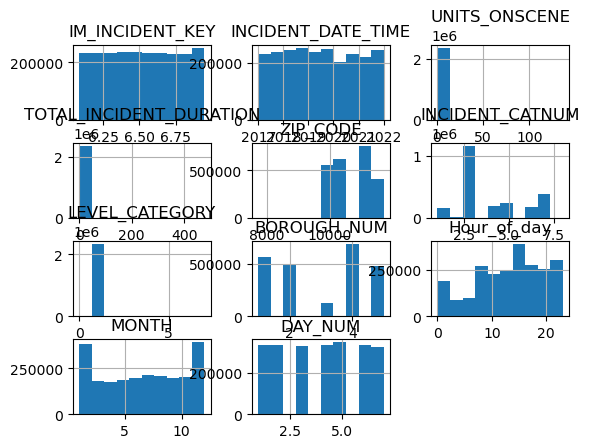

In [30]:
df.hist()

In [ ]:
sns.pairplot(df)

In [ ]:
sns.relplot(x='UNITS_ONSCENE', y='LEVEL_CATEGORY', hue='BOROUGH_DESC', data=df)

In [ ]:
sns.relplot(x='LEVEL_CATEGORY', y='UNITS_ONSCENE', hue='BOROUGH_DESC', data=df)

In [ ]:
sns.catplot(data=df, kind="bar",y ='BOROUGH_DESC', x ='LEVEL_CATEGORY')

In [ ]:
sns.catplot(data=df, kind="bar",x ='BOROUGH_DESC', y ='Hour_of_day')

In [ ]:
sns.catplot(data=df, kind="bar",y ='BOROUGH_DESC', x ='Month')

In [ ]:
df.plot.line(x='Hour_of_day', y='Month')